In [1]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean.csv')
data.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,27.0,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,28.7,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,25.3,75.0,70.0,0
3,3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,28.6,65.0,103.0,1
4,4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,23.1,85.0,85.0,0


In [3]:
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']

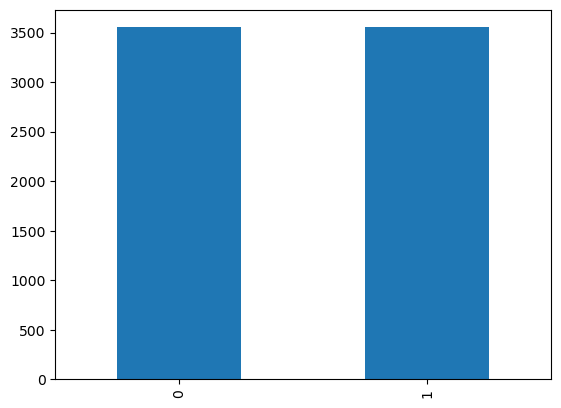

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)
X_train.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
3606,3653,0,38,1.0,1,30.0,0.0,0,0,0,164.0,113.0,25.8,70.0,75.0
794,805,1,49,3.0,1,3.0,0.0,0,0,0,219.0,130.0,24.4,60.0,65.0
3366,3411,1,63,1.0,1,9.0,0.0,0,0,0,188.0,113.0,29.0,74.0,93.0
1536,1556,0,43,2.0,0,0.0,0.0,0,0,0,213.0,96.0,19.4,74.0,80.0
1561,1583,1,36,2.0,1,20.0,0.0,0,0,0,242.0,118.5,24.0,78.0,103.0


In [6]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
# X_train.head()

X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index
y_test.index= X_test.index

X_train.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,1.228669,-0.768723,-1.642620,-0.958847,1.201453,1.788737,-0.23276,-0.056354,-0.651694,-0.154164,-1.764383,-1.054282,-0.080970,-0.545019,-0.317135
1,-1.074921,1.300859,-0.274204,1.121203,1.201453,-0.563950,-0.23276,-0.056354,-0.651694,-0.154164,-0.479917,-0.293508,-0.438719,-1.435406,-0.681809
2,1.032929,1.300859,1.467417,-0.958847,1.201453,-0.041131,-0.23276,-0.056354,-0.651694,-0.154164,-1.203889,-1.054282,0.736742,-0.188865,0.339279
3,-0.467479,-0.768723,-1.020613,0.081178,-0.832325,-0.825360,-0.23276,-0.056354,-0.651694,-0.154164,-0.620041,-1.815057,-1.716393,-0.188865,-0.134798
4,-0.445640,1.300859,-1.891423,0.081178,1.201453,0.917371,-0.23276,-0.056354,-0.651694,-0.154164,0.057223,-0.808150,-0.540933,0.167290,0.703953


In [7]:
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
predictions = model.predict(X_test)

Classificatio report               precision    recall  f1-score   support

           0       0.72      0.71      0.71       719
           1       0.71      0.71      0.71       703

    accuracy                           0.71      1422
   macro avg       0.71      0.71      0.71      1422
weighted avg       0.71      0.71      0.71      1422

********
Accuracy with Logistic Regression:  0.7109704641350211
********
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       719
           1       0.71      0.71      0.71       703

    accuracy                           0.71      1422
   macro avg       0.71      0.71      0.71      1422
weighted avg       0.71      0.71      0.71      1422



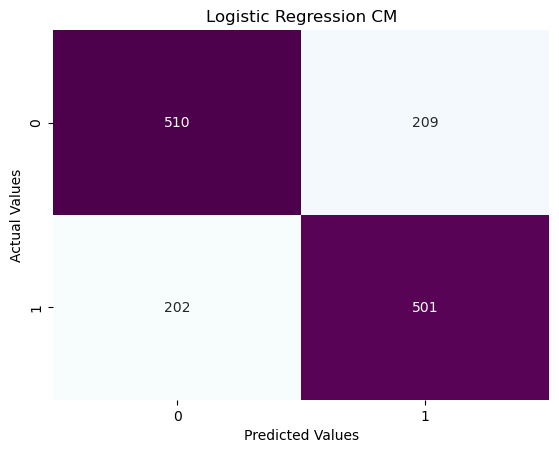

The confusion matrix [[510 209]
 [202 501]]


In [10]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print('Classificatio report',classification_report(y_test,predictions))
print('********')

print('Accuracy with Logistic Regression: ',accuracy_score(y_test,predictions))
print('********')

print('The confusion matrix',my_confusion_matrix(y_test,predictions,'Logistic Regression CM'))

## Predicting using KNN

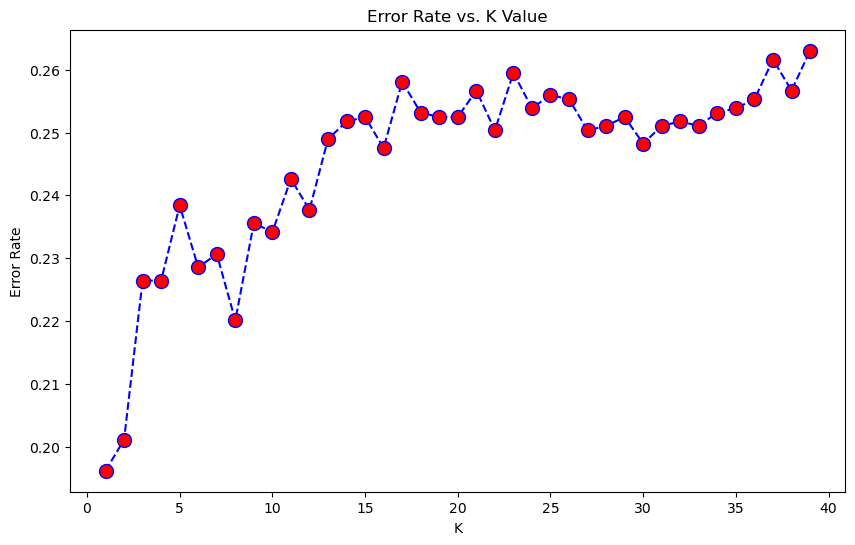

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    pred_i_knn = knn.predict(X_test)
    error_rate.append(np.mean(pred_i_knn != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Notice that the lowest error rate is at k=1 

KNN Accuracy Score:  0.8037974683544303
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       719
           1       0.75      0.90      0.82       703

    accuracy                           0.80      1422
   macro avg       0.81      0.80      0.80      1422
weighted avg       0.82      0.80      0.80      1422



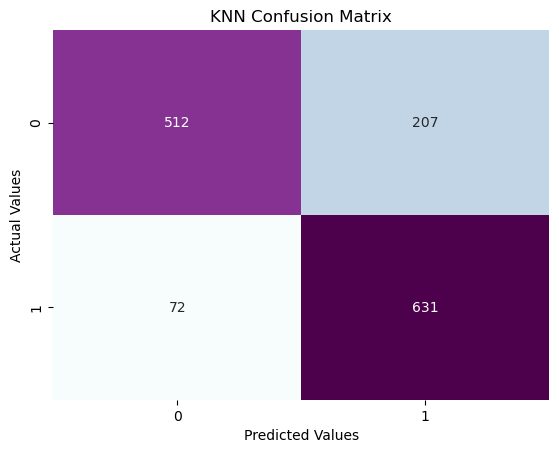

In [20]:

knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=2) # use n_neighbours = 1 from above graph 
knn_classifier.fit(X_train, y_train)
y_pred_knn=knn_classifier.predict(X_test)
print('KNN Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_knn=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

## Fit Decision Tree Classifier

Decision Tree Accuracy Score:  0.8037974683544303
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       719
           1       0.78      0.85      0.81       703

    accuracy                           0.80      1422
   macro avg       0.81      0.80      0.80      1422
weighted avg       0.81      0.80      0.80      1422



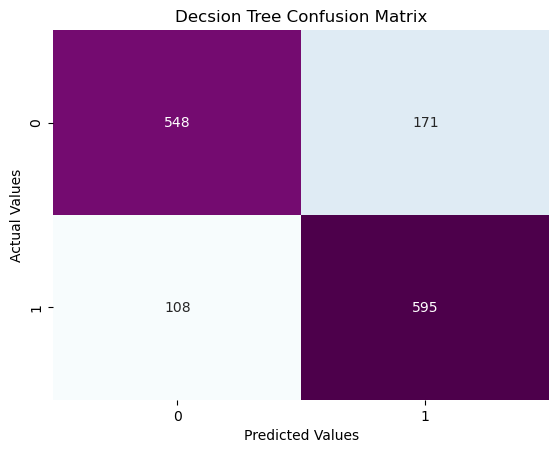

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt=dt_classifier.predict(X_test)
print('Decision Tree Accuracy Score: ',accuracy_score(y_test,y_pred_dt))
cm_knn=my_confusion_matrix(y_test, y_pred_dt, 'Decsion Tree Confusion Matrix')

## Fit XGB Boost Classifier: 

XGB Accuracy Score:  0.8980309423347398
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       719
           1       0.93      0.85      0.89       703

    accuracy                           0.90      1422
   macro avg       0.90      0.90      0.90      1422
weighted avg       0.90      0.90      0.90      1422



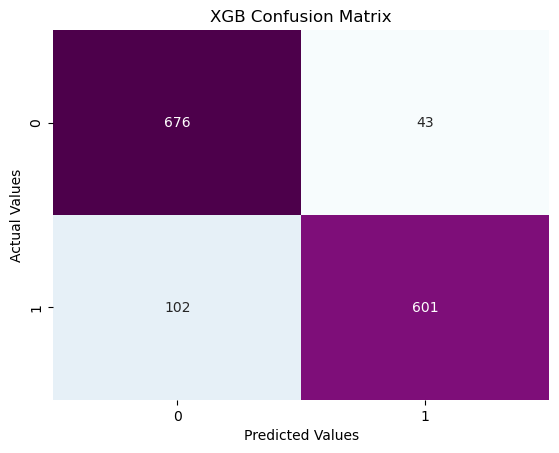

In [24]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb=xgb_classifier.predict(X_test)
print('XGB Accuracy Score: ',accuracy_score(y_test,y_pred_xgb))
cm_knn=my_confusion_matrix(y_test, y_pred_xgb, 'XGB Confusion Matrix')